In [2]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from numpy import log10 as lg
from numpy import pi as pi
from scipy.interpolate import interp1d as sp_interp1d
from scipy.integrate import odeint
from scipy.integrate import ode
import warnings
import timeit
import scipy.optimize as opt
from matplotlib import cm
from astropy import constants as const
from astropy import units as u
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
G=const.G.cgs.value
c=const.c.cgs.value
Ms=const.M_sun.cgs.value
hbar=const.hbar.cgs.value
m_n=const.m_n.cgs.value
km=10**5

import matplotlib.font_manager as font_manager

plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['ytick.minor.size'] = 4
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['axes.labelpad'] = 8.0
plt.rcParams['figure.constrained_layout.h_pad'] = 0
plt.rcParams['text.usetex'] = True
plt.rc('text', usetex=True)
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.tick_params(axis='both', which='minor', labelsize=18)

from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

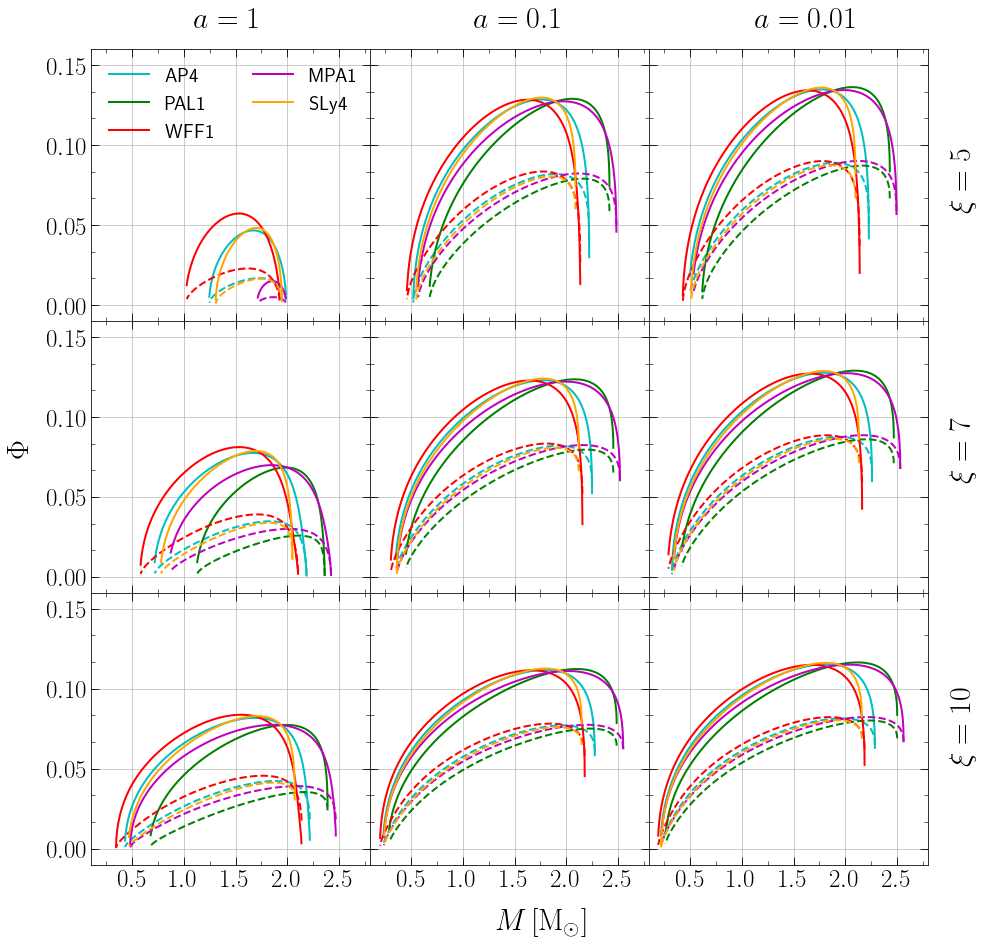

In [5]:
names= ['AP4','PAL1','WFF1','MPA1','SLy4']
numbers=['1', '01', '001']
colors = ['c', 'g', 'r', 'm', 'orange',  'y', 'grey']
fig, axs = plt.subplots(3, 3,figsize=(15,15),sharex=True, sharey=True)
plt.subplots_adjust(hspace=0.0)
plt.subplots_adjust(wspace=0.0)
import matplotlib.font_manager as font_manager
font = font_manager.FontProperties(family='Times New Roman', weight='bold', style='normal', size=20)
axs[0,0].yaxis.set_minor_locator(MultipleLocator(0.05/3))
axs[0,0].xaxis.set_minor_locator(MultipleLocator(0.25))
for j in range(len(names)):
    
    for i in range(len(numbers)):
        
        data1 = np.genfromtxt('data/'+ names[j]+ '_5_'+numbers[i]+'.txt')
        M, phic, phis = data1[:,1]/Ms, data1[:, 4], data1[:, 8]
        index=np.where(M==max(M))[0][0]
        
        if i>0:
            
            axs[0,i].plot(M[index::-1],phic[index::-1],linewidth=2, color=colors[j])
            axs[0,i].plot(M[index::-1],phis[index::-1],linewidth=2, color=colors[j],linestyle='--')
            
        if i==0:
        
            axs[0,i].plot(M[index::-1],phic[index::-1],linewidth=2, color=colors[j],label=names[j])
            axs[0,i].plot(M[index::-1],phis[index::-1],linewidth=2, color=colors[j],linestyle='--')
            axs[0,i].legend(frameon=False, prop=font,ncol=2,loc='upper left')
            
        axs[0,i].set_ylim(-0.01,0.16)
        axs[0,i].set_xlim(0.1,2.8)
        axs[0,i].set_xticks([0.5, 1.0, 1.5, 2.0, 2.5])
        axs[0,i].grid(alpha=0.8)
                
        data2 = np.genfromtxt('data/'+ names[j]+ '_7_'+numbers[i]+'.txt')
        M, phic, phis = data2[:,1]/Ms, data2[:, 4], data2[:, 8]
        index=np.where(M==max(M))[0][0]
        axs[1,i].plot(M[index::-1],phic[index::-1],linewidth=2, color=colors[j])
        axs[1,i].plot(M[index::-1],phis[index::-1],linewidth=2, color=colors[j],linestyle='--')
        axs[1,i].grid(alpha=0.8)
        
        data3 = np.genfromtxt('data/'+ names[j]+ '_10_'+numbers[i]+'.txt')
        M, phic, phis = data3[:,1]/Ms, data3[:, 4], data3[:, 8]
        index=np.where(M==max(M))[0][0]
        axs[2,i].plot(M[index::-1],phic[index::-1],linewidth=2, color=colors[j])
        axs[2,i].plot(M[index::-1],phis[index::-1],linewidth=2, color=colors[j],linestyle='--')
        axs[2,i].grid(alpha=0.8)
        
fig.text(0.06, 0.5, r'$\Phi$', ha='center', fontsize=30, rotation='vertical')
fig.text(0.5, 0.06, r'$M\,[{\rm M_{\odot}}]$' ,fontsize=30)      
fig.text(0.92, 0.77, r'$\xi=5$' ,fontsize=30, rotation='90')     
fig.text(0.92, 0.52, r'$\xi=7$' ,fontsize=30, rotation='90')     
fig.text(0.92, 0.27, r'$\xi=10$' ,fontsize=30, rotation='90')     
fig.text(0.22, 0.9, r'$a=1$' ,fontsize=30)     
fig.text(0.48, 0.9, r'$a=0.1$' ,fontsize=30)     
fig.text(0.74, 0.9, r'$a=0.01$' ,fontsize=30)   
plt.savefig("Phi.pdf", format='pdf', bbox_inches="tight")

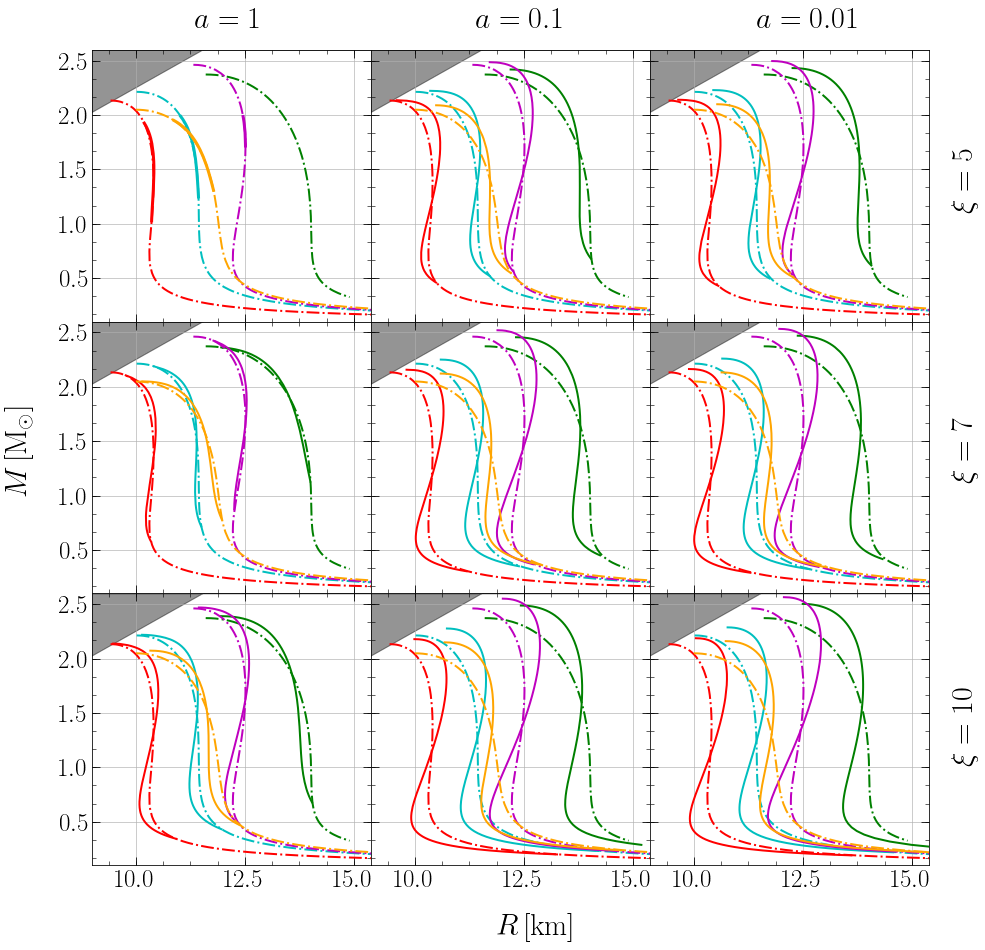

In [7]:
names= ['AP4','PAL1','WFF1','MPA1','SLy4']
numbers=['1', '01', '001']
colors = ['c', 'g', 'r', 'm', 'orange',  'y', 'grey']
fig, axs = plt.subplots(3, 3,figsize=(15,15),sharex=True, sharey=True)
plt.subplots_adjust(hspace=0.0)
plt.subplots_adjust(wspace=0.0)
import matplotlib.font_manager as font_manager
font = font_manager.FontProperties(family='Times New Roman', weight='bold', style='normal', size=25)
axs[0,0].yaxis.set_minor_locator(MultipleLocator(0.5/3))
axs[0,0].xaxis.set_minor_locator(MultipleLocator(2.5/4))

for j in range(len(names)):
    
    for i in range(len(numbers)):
        
        data1 = np.genfromtxt('data/'+ names[j]+ '_5_'+numbers[i]+'.txt')
        data11=np.genfromtxt('data/'+ names[j]+ '_5_'+numbers[i]+'.txt')
        M1, R1 = data1[:,1]/Ms, data1[:, 3]/10**5 * (1+ 5*data1[:,8]**2)**(-1/2)
        index=np.where(M1==max(M1))[0][0]
        if i==0:
            
            axs[0,i].plot(R1[index::-1],M1[index::-1],linewidth=3, color=colors[j])
            
        else:
            axs[0,i].plot(R1[index::-1],M1[index::-1],linewidth=2, color=colors[j])
            
        axs[0,i].set_ylim(0.1,2.6)
        axs[0,i].set_xlim(9.0,15.4)
        
        Ra=np.linspace(6,18,100)
        MB=Ra*10**5*c**2/3/G/Ms
        axs[0,i].fill_between(Ra, MB, 2.6,color='black',alpha=0.1)
#         axs[0,i].plot(Ra,MB, color='black',linewidth=2,alpha=0.1)
        axs[0,i].grid(alpha=0.8)
        
        data11=np.genfromtxt('data/'+'TOV_4eqs_'+ names[j]+ '.txt')
        M2, R2 = data11[:,1]/Ms, data11[:, 3]/10**5
        index=np.where(M2==max(M2))[0][0]
        axs[0,i].plot(R2[index::-1],M2[index::-1],linewidth=2, color=colors[j],linestyle='-.')
        axs[0,i].grid(alpha=0.8)

        
                
        data2 = np.genfromtxt('data/'+ names[j]+ '_7_'+numbers[i]+'.txt')
        M1, R1 = data2[:,1]/Ms, data2[:, 3]/10**5* (1+ 7*data2[:,8]**2)**(-1/2)
        index=np.where(M1==max(M1))[0][0]
        axs[1,i].plot(R1[index::-1],M1[index::-1],linewidth=2, color=colors[j])
        
        Ra=np.linspace(6,18,100)
        MB=Ra*10**5*c**2/3/G/Ms
        axs[1,i].fill_between(Ra, MB, 2.6,color='black',alpha=0.1)
#         axs[1,i].plot(Ra,MB, color='black',linewidth=2,alpha=0.6)?
        axs[1,i].grid(alpha=0.8)
        
        data21=np.genfromtxt('data/'+'TOV_4eqs_'+ names[j]+ '.txt')
        M2, R2 = data21[:,1]/Ms, data21[:, 3]/10**5
        index=np.where(M2==max(M2))[0][0]
        axs[1,i].plot(R2[index::-1],M2[index::-1],linewidth=2, color=colors[j],linestyle='-.')
        axs[1,i].grid(alpha=0.8)
        
        data3 = np.genfromtxt('data/'+ names[j]+ '_10_'+numbers[i]+'.txt')
        M1, R1 = data3[:,1]/Ms, data3[:, 3]/10**5* (1+ 10*data3[:,8]**2)**(-1/2)
        index=np.where(M1==max(M1))[0][0]
        axs[2,i].plot(R1[index::-1],M1[index::-1],linewidth=2, color=colors[j])
        
        Ra=np.linspace(6,18,100)
        MB=Ra*10**5*c**2/3/G/Ms
        axs[2,i].fill_between(Ra, MB, 2.6,color='black',alpha=0.1)
#         axs[2,i].plot(Ra,MB, color='black',linewidth=2,alpha=0.6)
        axs[2,i].grid(alpha=0.8)
        
        data31=np.genfromtxt('data/'+'TOV_4eqs_'+ names[j]+ '.txt')
        M2, R2 = data31[:,1]/Ms, data31[:, 3]/10**5
        index=np.where(M2==max(M2))[0][0]
        axs[2,i].plot(R2[index::-1],M2[index::-1],linewidth=2, color=colors[j],linestyle='-.')
        
        
fig.text(0.06, 0.53, r'$M\,[{\rm M_{\odot}}]$', ha='center', fontsize=30,rotation='vertical')
fig.text(0.5, 0.06, r'$R\,[\rm km]$' ,fontsize=30)      
fig.text(0.92, 0.77, r'$\xi=5$' ,fontsize=30, rotation='90')     
fig.text(0.92, 0.52, r'$\xi=7$' ,fontsize=30, rotation='90')     
fig.text(0.92, 0.27, r'$\xi=10$' ,fontsize=30, rotation='90')     
fig.text(0.22, 0.9, r'$a=1$' ,fontsize=30)     
fig.text(0.48, 0.9, r'$a=0.1$' ,fontsize=30)     
fig.text(0.74, 0.9, r'$a=0.01$' ,fontsize=30)   
plt.savefig("MR.pdf", format='pdf', bbox_inches="tight")

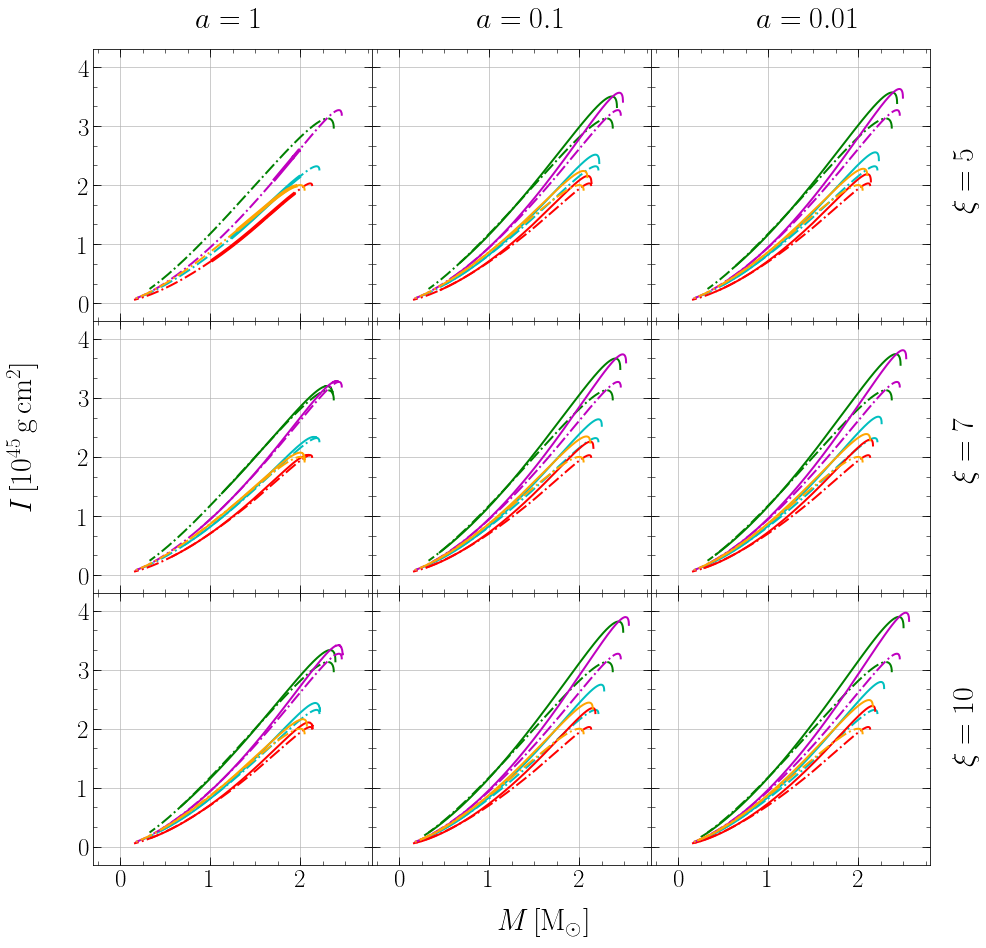

In [4]:
names= ['AP4','PAL1','WFF1','MPA1','SLy4']
numbers=['1', '01', '001']
colors = ['c', 'g', 'r', 'm', 'orange',  'y', 'grey']
fig, axs = plt.subplots(3, 3,figsize=(15,15),sharex=True, sharey=True)
plt.subplots_adjust(hspace=0.0)
plt.subplots_adjust(wspace=0.0)

font = font_manager.FontProperties(family='Times New Roman', weight='bold', style='normal', size=25)
axs[0,0].yaxis.set_minor_locator(MultipleLocator(1/3))
axs[0,0].xaxis.set_minor_locator(MultipleLocator(1/4))
for j in range(len(names)):
    
    for i in range(len(numbers)):
        
        data1 = np.genfromtxt('data/'+ names[j]+ '_5_'+numbers[i]+'.txt')
        M1, I1 = data1[:,1]/Ms, data1[:, 5]/10**45
        index=np.where(M1==max(M1))[0][0]
        if i==0:
            
            axs[0,i].plot(M1[index::-1],I1[index::-1],linewidth=3.5, color=colors[j])
            
        else:
            axs[0,i].plot(M1[index::-1],I1[index::-1],linewidth=2, color=colors[j])
            
        axs[0,i].set_ylim(-0.3,4.3)
        axs[0,i].set_xlim(-0.3,2.8)
        axs[0,i].set_xticks([0, 1.0,  2.0])
        
        data11=np.genfromtxt('data/'+'TOV_4eqs_'+ names[j]+ '.txt')
        M2, I2 = data11[:,1]/Ms, data11[:, 4]/10**45
        index=np.where(M2==max(M2))[0][0]
        axs[0,i].plot(M2[index::-1],I2[index::-1],linewidth=2, color=colors[j],linestyle='-.')
            
        axs[0,i].grid(alpha=0.8)

        
                
        data2 = np.genfromtxt('data/'+ names[j]+ '_7_'+numbers[i]+'.txt')
        M1, I1 = data2[:,1]/Ms, data2[:, 5]/10**45
        index=np.where(M1==max(M1))[0][0]
        axs[1,i].plot(M1[index::-1],I1[index::-1],linewidth=2, color=colors[j])
        
        data21=np.genfromtxt('data/'+'TOV_4eqs_'+ names[j]+ '.txt')
        M2, I2 = data21[:,1]/Ms, data21[:, 4]/10**45
        index=np.where(M2==max(M2))[0][0]
        axs[1,i].plot(M2[index::-1],I2[index::-1],linewidth=2, color=colors[j],linestyle='-.')
        axs[1,i].grid(alpha=0.8)
        
        data3 = np.genfromtxt('data/'+ names[j]+ '_10_'+numbers[i]+'.txt')
        M1, I1 = data3[:,1]/Ms, data3[:, 5]/10**45
        index=np.where(M1==max(M1))[0][0]
        axs[2,i].plot(M1[index::-1],I1[index::-1],linewidth=2, color=colors[j])
        
        data31=np.genfromtxt('data/'+'TOV_4eqs_'+ names[j]+ '.txt')
        M2, I2 = data31[:,1]/Ms, data31[:, 4]/10**45
        index=np.where(M2==max(M2))[0][0]
        axs[2,i].plot(M2[index::-1],I2[index::-1],linewidth=2, color=colors[j],linestyle='-.')
        axs[2,i].grid(alpha=0.8)
        
fig.text(0.06, 0.57, r'$I\,[\rm 10^{45}\,g\,cm^{2}]$', ha='center', fontsize=30,rotation='vertical')
fig.text(0.5, 0.06, r'$M\,[{\rm M_{\odot}}]$' ,fontsize=30)      
fig.text(0.92, 0.77, r'$\xi=5$' ,fontsize=30, rotation='90')     
fig.text(0.92, 0.52, r'$\xi=7$' ,fontsize=30, rotation='90')     
fig.text(0.92, 0.27, r'$\xi=10$' ,fontsize=30, rotation='90')     
fig.text(0.22, 0.9, r'$a=1$' ,fontsize=30)     
fig.text(0.48, 0.9, r'$a=0.1$' ,fontsize=30)     
fig.text(0.74, 0.9, r'$a=0.01$' ,fontsize=30)   
plt.savefig("moment.pdf", format='pdf', bbox_inches="tight")

/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


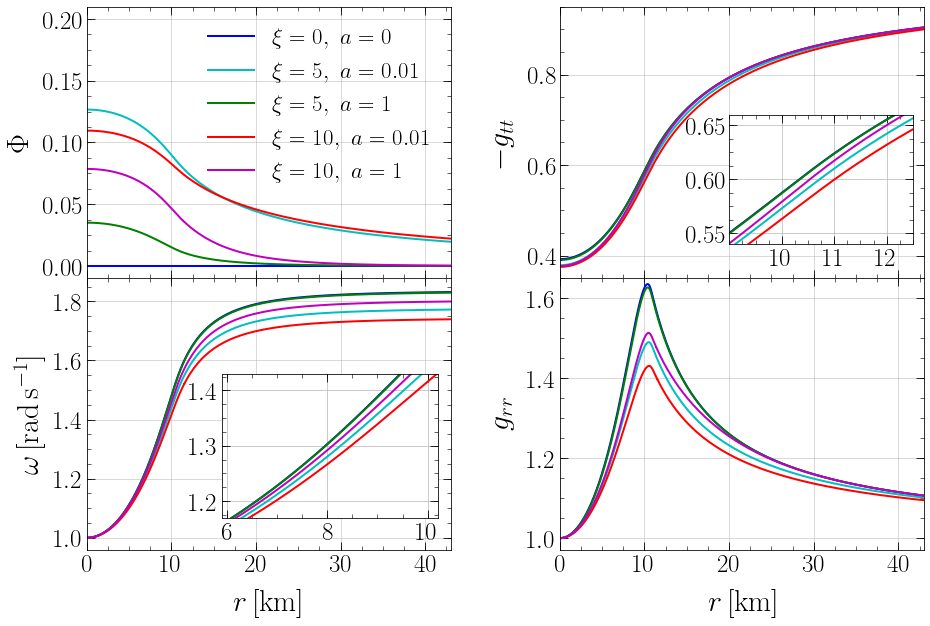

In [5]:
names= ['AP4']
numbers=['5_001', '5_1','10_001', '10_1']
colors = ['c', 'g', 'r', 'm','blue','k', 'orange',  'y', 'grey']
labels=[r'$\xi=5,\,\, a=0.01$', r'$\xi=5,\,\, a=1$',r'$\xi=10,\,\, a=0.01$',r'$\xi=10,\,\, a=1$']
fig, axs = plt.subplots(2, 2,figsize=(15,10),sharex=True, sharey=False)
plt.subplots_adjust(hspace=0.0)
plt.subplots_adjust(wspace=0.3)
font = font_manager.FontProperties(family='Times New Roman', weight='bold', style='normal', size=23)
data2=np.genfromtxt('data/'+'sol_'+ 'AP4'+ '_m14_00'+'.txt')
R, gtt, grr, omega = data2[:,0]/10**5, data2[:,1], data2[:, 2],data2[:, 3]
axs[0,1].plot(R,gtt,linewidth=2, color='b')
axs[1,0].plot(R,omega,linewidth=2, color='b')
axs[1,1].plot(R,grr,linewidth=2, color='b')

sub_axes = plt.axes([.72, .55, .17, .18]) 
sub_axes.plot(R,gtt,linewidth=2, color='b') 
sub_axes.set_ylim(0.54,0.66)
sub_axes.set_xlim(9,12.5)
sub_axes.set_xticks([10,11,12])
sub_axes.grid(alpha=0.8)

sub_axes = plt.axes([.25, .17, .20, .20]) 
sub_axes.plot(R, omega,linewidth=2, color='b') 
sub_axes.set_ylim(1.17,1.43)
sub_axes.set_xlim(5.9,10.2)
sub_axes.set_xticks([6,8,10])
sub_axes.set_yticks([1.2,1.3,1.4])
sub_axes.grid(alpha=0.8)
    
x1=np.linspace(0,50,300)
y1=0*x1
axs[0,0].plot(x1,y1,linewidth=2,label=r'$\xi=0,\,\, a=0$',color='b')   
axs[0,0].legend(frameon=False,fontsize=23)

axs[0,0].yaxis.set_minor_locator(MultipleLocator(0.05/4))
axs[0,1].yaxis.set_minor_locator(MultipleLocator(0.2/4))
axs[0,0].xaxis.set_minor_locator(MultipleLocator(10/4))
axs[1,0].yaxis.set_minor_locator(MultipleLocator(0.2/4))
axs[1,1].yaxis.set_minor_locator(MultipleLocator(0.2/4))

for j in range(len(names)):
    
    for i in range(len(numbers)):
        
        data1 = np.genfromtxt('data/'+'sol_'+ names[j]+ '_m14_'+numbers[i]+'.txt')
        R, gtt, grr, omega,phi = data1[:,0]/10**5, data1[:,1], data1[:, 2],data1[:, 3],data1[:, 5]
        
        axs[0,0].plot(R,phi,linewidth=2, color=colors[i], label=labels[i])
        axs[0,0].grid(alpha=0.6)
        axs[0,0].set_ylabel(r'$ \Phi$', fontsize=30)
        axs[0,0].legend(frameon=False, prop=font,ncol=1)
        axs[0,1].plot(R,gtt,linewidth=2, color=colors[i])
        axs[0,1].grid(alpha=0.6)
        
        sub_axes = plt.axes([.72, .55, .17, .18]) 
        sub_axes.plot(R,gtt,linewidth=2, color=colors[i]) 
        sub_axes.set_ylim(0.54,0.66)
        sub_axes.set_xlim(9,12.5)
        sub_axes.set_xticks([10,11,12])
        sub_axes.grid(alpha=0.8)
        sub_axes.yaxis.set_minor_locator(MultipleLocator(0.05/4))
        sub_axes.xaxis.set_minor_locator(MultipleLocator(1/4))
        
#         这种方法失败了
#         axins = zoomed_inset_axes(axs[0,1], 1.3,loc=4)
#         axins.plot(R,gtt)
#         x1, x2, y1, y2 = 6, 18, 0.5, 0.8 # specify the limits
#         axins.set_xlim(x1, x2) # apply the x-limits
#         axins.set_ylim(y1, y2) # apply the y-limits
#         mark_inset(axs[0,1], sub_axes, loc1=3, loc2=2)
        
        axs[0,1].set_ylabel(r'$ -g_{tt}$', fontsize=30)
        axs[1,0].plot(R,omega,linewidth=2, color=colors[i])
        axs[1,0].grid(alpha=0.6)
        axs[1,0].set_ylabel(r'$ \omega\,[\rm rad\,s^{-1}]$', fontsize=30)
        
        sub_axes = plt.axes([.25, .17, .20, .20]) 
        sub_axes.plot(R,omega,linewidth=2, color=colors[i]) 
        sub_axes.set_ylim(1.17,1.43)
        sub_axes.set_xlim(5.9,10.2)
        sub_axes.set_xticks([6,8,10])
        sub_axes.set_yticks([1.2,1.3,1.4])
        sub_axes.grid(alpha=0.8)
        sub_axes.yaxis.set_minor_locator(MultipleLocator(0.1/4))
        sub_axes.xaxis.set_minor_locator(MultipleLocator(2/4))
        
#         这种方法失败了
#         axins = zoomed_inset_axes(axs[0,1], 1.3,loc=4)
#         axins.plot(R,gtt)
#         x1, x2, y1, y2 = 6, 18, 0.5, 0.8 # specify the limits
#         axins.set_xlim(x1, x2) # apply the x-limits
#         axins.set_ylim(y1, y2) # apply the y-limits
#         mark_inset(axs[1,0], sub_axes, loc1=1, loc2=3)
    
    
        axs[1,1].plot(R,grr,linewidth=2, color=colors[i])
        axs[1,1].set_ylabel(r'$ g_{rr}$', fontsize=30)
        axs[1,1].grid(alpha=0.6)

        axs[1,1].set_ylim(0.97,1.65)
        axs[0,1].set_ylim(0.95,1.65)
        axs[0,0].set_ylim(-0.01,0.21)
        axs[0,1].set_ylim(0.35,0.95)
        axs[0,0].set_xlim(0,43)
        axs[0,0].set_xticks([0,10,20,30,40])
    
    fig.text(0.26, 0.04, r'$r\,[\rm km]$' ,fontsize=30)
    fig.text(0.7, 0.04, r'$r\,[\rm km]$' ,fontsize=30) 
    
plt.savefig("ap4.pdf", format='pdf', bbox_inches="tight")